<a href="https://colab.research.google.com/github/EluSin74/EluSin74/blob/main/Handwritten.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [ ]:
(X_train, Y_train), (X_test, Y_test) =  mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
type(X_train)

numpy.ndarray

In [ ]:

print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training data = 60,000 Images

Test data = 10,000 Images

Image dimension  --> 28 x 28

Grayscale Image  --> 1 channel

In [ ]:


print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [ ]:
print(X_train[10].shape)

(28, 28)


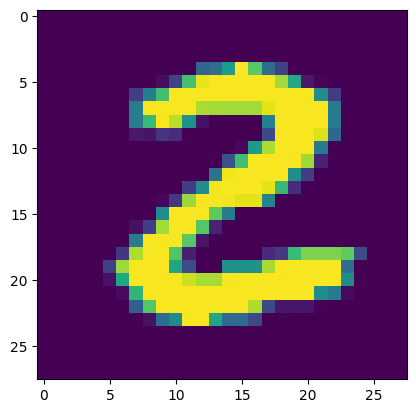

2


In [ ]:


plt.imshow(X_train[25])
plt.show()


print(Y_train[25])

Image Lables

In [ ]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [ ]:

print(np.unique(Y_train))

print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [ ]:


X_train = X_train/255
X_test = X_test/255

In [ ]:

print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [ ]:

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')
])

In [ ]:

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:

model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2957 - accuracy: 0.9140
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1374 - accuracy: 0.9592
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1005 - accuracy: 0.9699
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0822 - accuracy: 0.9746
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0663 - accuracy: 0.9796
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0574 - accuracy: 0.9814
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0507 - accuracy: 0.9833
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0444 - accuracy: 0.9853
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0394 - accuracy: 0.9868
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.034

Training data accuracy = 98.9%

In [ ]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1007 - accuracy: 0.9725
0.9725000262260437


Test data accuracy = 97.1%

In [ ]:
print(X_test.shape)

(10000, 28, 28)


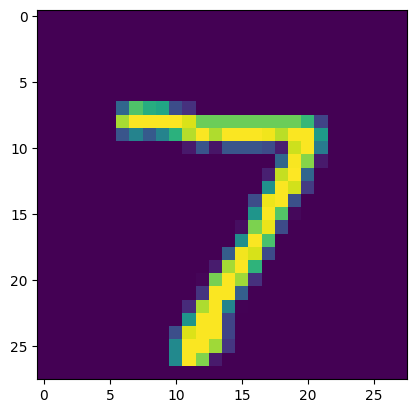

In [ ]:

plt.imshow(X_test[0])
plt.show()

In [ ]:
print(Y_test[0])

7


In [ ]:
Y_pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
print(Y_pred.shape)

(10000, 10)


In [ ]:
print(Y_pred[0])

[1.3099120e-04 3.0357453e-01 4.6488374e-02 9.9995309e-01 1.0762745e-05
 9.3743287e-02 3.1173249e-07 9.9999940e-01 6.2224898e-03 3.1622538e-01]


In [ ]:


label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [ ]:

Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 8, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [ ]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)

In [ ]:
print(conf_mat)

tf.Tensor(
[[ 960    0    2    2    4    5    4    2    1    0]
 [   0 1125    1    2    0    1    2    0    4    0]
 [   4    5  991    7    2    2    2    9   10    0]
 [   0    0    1  976    0   16    1    4    8    4]
 [   0    0    5    1  954    2    2    3    4   11]
 [   0    0    0    6    1  876    0    2    5    2]
 [   1    2    2    1    5   13  930    0    4    0]
 [   1    7    7    7    1    0    0  997    4    4]
 [   0    0    1    5    2    9    2    4  947    4]
 [   0    3    0    4   17    5    0    6    5  969]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

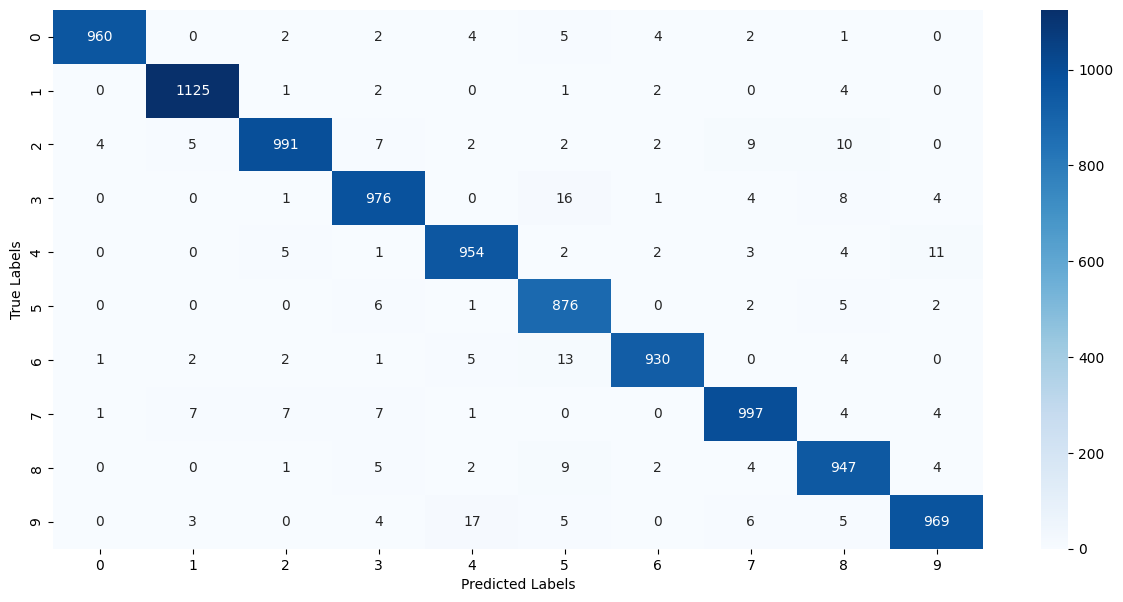

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

Building a Predictive System

Prediction image link: https://camo.githubusercontent.com/3d9666a8f0c5658667292b74ca19295827c2b22a0e903db283998ae213e6f6e1/68747470733a2f2f646174616d61646e6573732e6769746875622e696f2f6173736574732f696d616765732f74665f66696c655f666565642f4d4e4953545f64696769742e706e67

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
input_image_path = '//content/drive/MyDrive/ML project/MNIST_digit.png'

input_image = cv2.imread(input_image_path)

In [ ]:
type(input_image)

numpy.ndarray

In [ ]:
print(input_image)

[[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 ...

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[11 11 11]
  [34 34 34]
  [34 34 34]
  ...
  [34 34 34]
  [34 34 34]
  [22 22 22]]]


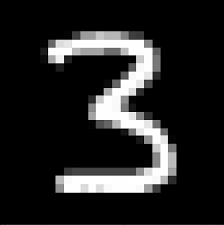

In [ ]:
cv2_imshow(input_image)

In [ ]:
input_image.shape

(1480, 1490, 3)

In [ ]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [ ]:
grayscale.shape

(1480, 1490)

In [ ]:
input_image_resize = cv2.resize(grayscale, (28, 28))

In [ ]:
input_image_resize.shape

(28, 28)

In [ ]:
cv2_imshow(input_image_resize)

In [ ]:
input_image_resize = input_image_resize/255

In [ ]:
type(input_image_resize)

numpy.ndarray

In [ ]:
image_reshaped = np.reshape(input_image_resize, [1,28,28])

In [ ]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 20ms/step
[[1.2960291e-04 3.0253243e-01 4.7179129e-02 9.9995303e-01 1.0579447e-05
  9.7105525e-02 3.2366214e-07 9.9999940e-01 6.1725504e-03 3.1573188e-01]]


In [ ]:
input_pred_label = np.argmax(input_prediction)

In [ ]:
print(input_pred_label)

7


**Predictive System**

Path of the image to be predicted: /content/drive/MyDrive/ML project/MNIST_digit.png


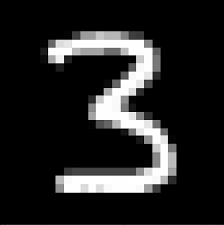

1/1 [==============================] - 0s 21ms/step
The Handwritten Digit is recognised as  3


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)

In [ ]:
!pip install tensorflow
